<a href="https://colab.research.google.com/github/estebanvz/redes_neuronales_pytorch/blob/aula-4/Redes_Neuronales_Deep_Learning_con_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alura - Redes Neuronales: Deep Learning con PyTorch

## Pytorch vs Numpy

In [ ]:
TAMANO=1000000000

In [ ]:
import numpy as np
def funcion_activacion(x):
  if(x>=0.0):
    return 1
  else:
    return 0
class Perceptron():
  def __init__(self, datos_entrada):
    self.datos_entrada = np.array(datos_entrada)
    self.pesos = np.array([1.0,-1.0,1.0]*TAMANO)
  def forward(self,):
    self.datos_salida = self.datos_entrada @ self.pesos
    return funcion_activacion(self.datos_salida)


In [ ]:
%%time
datos_entrada = [0.22,0.170,0.80]*TAMANO
perceptron = Perceptron(datos_entrada)
prediccion = perceptron.forward()
prediccion

In [ ]:
import torch
gpu = torch.device("cuda")
class PerceptronTorch():
  def __init__(self, datos_entrada):
    self.datos_entrada = torch.tensor(datos_entrada).to(gpu)
    self.pesos = torch.tensor([1.0,-1.0,1.0]*TAMANO).to(gpu)
  def forward(self,):
    self.datos_salida = self.datos_entrada @ self.pesos
    return funcion_activacion(self.datos_salida)

In [ ]:
%%time
datos_entrada = [0.22,0.170,0.80]*TAMANO
perceptron = PerceptronTorch(datos_entrada)
prediccion = perceptron.forward()
prediccion

## Operaciones con tensores

In [ ]:
import torch
torch.rand(size=(5,2)).double()

In [ ]:
pesos = torch.tensor([1.0,1.0,1.0])
tmp = torch.rand(size=(5,3))
tmp

In [ ]:
tmp @ pesos

In [ ]:
pesos = torch.tensor([[1.0,1.0,1.0]]).T
torch.mm(tmp,pesos)

In [ ]:
torch.mm(tmp,pesos) + torch.ones(size=(5,1))*2

## MLP


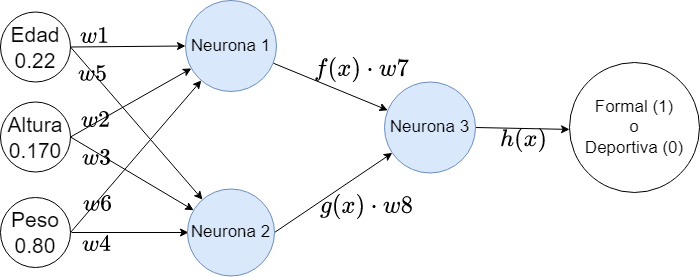

In [ ]:
import torch
import torch.nn as nn
class MLP(nn.Module):
  def __init__(self, dim_1,dim_2,dim_3):
    super(MLP,self).__init__()
    self.capa1 = nn.Linear(dim_1,dim_2) ## dim_1 -> dimensión de los datos de entrada
    self.capa2 = nn.Linear(dim_2,dim_3) ## dim_2 -> dimensión de los datos de la primera capa
  def forward(self, data):
    resultado_capa1 = self.capa1(data) ## tmp = data @ pesos_capa1
    resultado_capa2 = self.capa2(resultado_capa1) ## tmp = tmp @ pesos_capa2
    return resultado_capa2


In [ ]:
mlp = MLP(dim_1=3,dim_2=2,dim_3=1).to("cuda")

In [ ]:
data =torch.tensor([10.0,1.0,1.0])
mlp.forward(data)

## Previsión de demanda

## Librerias

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import seaborn as sns
sns.set(rc={'figure.figsize':(15,5)})

In [2]:
data_train = pd.read_parquet("/content/dataset_train.parquet")
data_train.head()

,date,t-4,t-3,t-2,t-1,sales
0,2018-01-01,73,68,63,66,33
1,2018-01-02,68,63,66,33,38
2,2018-01-03,63,66,33,38,46
3,2018-01-04,66,33,38,46,52
4,2018-01-05,33,38,46,52,42


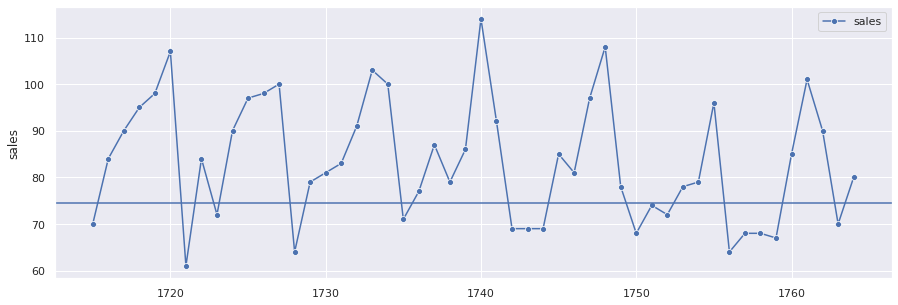

In [3]:
sns.lineplot(data=data_train["sales"][-50:],label="sales",marker="o").axhline(data_train["sales"].mean())
# sns.lineplot(data=data_train["t-4"][-50:],label="t-2",marker="o")

### Modelos

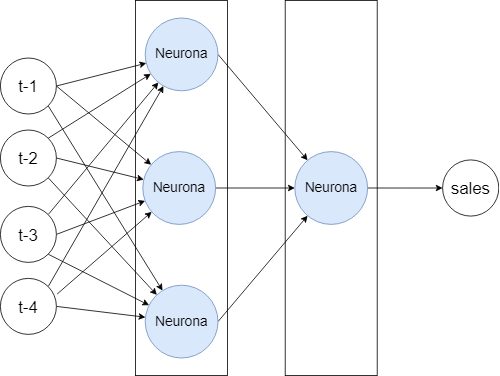

In [4]:
class MLP_01(nn.Module):
  def __init__(self,):
    super(MLP_01,self).__init__()
    self.l1 = nn.Linear(4,3)
    self.l2 = nn.Linear(3,1)
  def forward(self,data):
    r1 = self.l1(data)
    r2 = self.l2(r1)
    return r2
class MLP_02(nn.Module):
  def __init__(self,):
    super(MLP_02,self).__init__()
    self.l1 = nn.Linear(4,8)
    self.l2 = nn.Linear(8,1)
  def forward(self,data):
    r1 = self.l1(data)
    r2 = self.l2(r1)
    return r2
class MLP_03(nn.Module):
  def __init__(self,):
    super(MLP_03,self).__init__()
    self.l1 = nn.Linear(4,8)
    self.l2 = nn.Linear(8,1)
  def forward(self,data):
    r1 = self.l1(data)
    r1 = torch.relu(r1)
    r2 = self.l2(r1)
    r2 = torch.relu(r2)
    return r2
class MLP_03(nn.Module):
  def __init__(self,):
    super(MLP_03,self).__init__()
    self.l1 = nn.Linear(4,8)
    self.l2 = nn.Linear(8,1)
  def forward(self,data):
    r1 = self.l1(data)
    r1 = torch.relu(r1)
    r2 = self.l2(r1)
    r2 = torch.relu(r2)
    return r2
class MLP_04(nn.Module):
  def __init__(self,):
    super(MLP_04,self).__init__()
    self.l1 = nn.Linear(4,254)
    self.l2 = nn.Linear(254,32)
    self.l3 = nn.Linear(32,1)
  def forward(self,data):
    r1 = self.l1(data)
    r1 = torch.relu(r1)
    r2 = self.l2(r1)
    r2 = torch.sigmoid(r2)
    r3 = self.l3(r2)
    r3 = torch.relu(r3)
    return r3

In [5]:
def train_model(model:nn.Module,data,sales,epocas=20):
  if(type(data)==pd.DataFrame):
    data =  data.values
    sales =  sales.values
  if(type(data)==np.ndarray):
    data = torch.tensor(data, dtype=torch.float32)
    sales = torch.tensor(sales, dtype=torch.float32)
    sales = torch.reshape(sales,(-1,1))
  criterio = nn.L1Loss()
  optimizador = torch.optim.RMSprop(model.parameters())
  for i in range(epocas):
    resultados = model(data)
    loss = criterio(sales,resultados)
    optimizador.zero_grad()
    loss.backward()
    optimizador.step()
    if(i%10==0):
      print(f'MAE:{loss.item()}')

  return resultados

In [6]:
dates = data_train.pop("date")
sales = data_train.pop("sales")
data_train.head()

,t-4,t-3,t-2,t-1
0,73,68,63,66
1,68,63,66,33
2,63,66,33,38
3,66,33,38,46
4,33,38,46,52


In [7]:
train_model(MLP_01(), data_train,sales)

MAE:59.71364974975586
MAE:13.234556198120117


tensor([[68.6675],
        [57.5266],
        [55.7330],
        ...,
        [76.9043],
        [81.6749],
        [87.4179]], grad_fn=<AddmmBackward0>)

In [8]:
r2 = train_model(MLP_02(), data_train,sales)

MAE:84.61526489257812
MAE:16.96261215209961


In [ ]:
r3 = train_model(MLP_03(),data_train,sales,epocas=1000)
r3 = torch.reshape(r3,(-1,)).tolist()

In [ ]:
r4 = train_model(MLP_04(),data_train,sales,epocas=1000)
r4 = torch.reshape(r4,(-1,)).tolist()

In [11]:
np.average(np.abs(sales.values-sales.mean()))

16.29733967851439

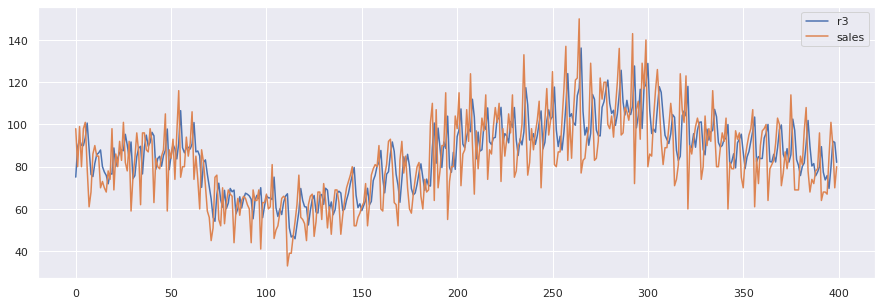

In [12]:
sns.lineplot(data=r3[-400:],label="r3")
sns.lineplot(data=sales.values[-400:],label="sales")